# Study of wavefront sensitivity over fine alignment

We are using the code given by Oasys to estimate the sensitivity over fine alignment for a toroid.
See ALS-U_Examples/ for OASYS simulations

In [1]:
import Shadow
import numpy

In [2]:
iwrite = 0

beam = Shadow.Beam()
oe0 = Shadow.Source()
oe1 = Shadow.OE()
oe2 = Shadow.OE()

# Define variables. See meaning of variables in: 
oe0.FDISTR = 1
oe0.F_PHOT = 0
oe0.HDIV1 = 0.001
oe0.HDIV2 = 0.001
oe0.IDO_VX = 0
oe0.IDO_VZ = 0
oe0.IDO_X_S = 0
oe0.IDO_Y_S = 0
oe0.IDO_Z_S = 0
oe0.ISTAR1 = 0
oe0.NPOINT = 1000
oe0.PH1 = 603.0
oe0.SIGMAX = 0.0
oe0.SIGMAZ = 0.0
oe0.VDIV1 = 0.001
oe0.VDIV2 = 0.001

oe1.DUMMY = 100.0
oe1.FHIT_C = 1
oe1.FMIRR = 3
oe1.FWRITE = 1
oe1.F_MOVE = 1
oe1.RLEN1 = 0.1
oe1.RLEN2 = 0.1
oe1.RWIDX1 = 0.0025
oe1.RWIDX2 = 0.0025
oe1.T_IMAGE = 2.2
oe1.T_INCIDENCE = 88.5
oe1.T_REFLECTION = 88.5
oe1.T_SOURCE = 5.0

oe2.ALPHA = 90.0
oe2.DUMMY = 100.0
oe2.FWRITE = 3
oe2.F_REFRAC = 2
oe2.T_IMAGE = -1.0
oe2.T_INCIDENCE = 90.0
oe2.T_REFLECTION = 90.0
oe2.T_SOURCE = 0.0

## Running one simulation with 1mrad tilt along X

In [3]:
# what matters:
oe1.X_ROT = 0.057

#Run SHADOW to create the source
if iwrite:
    oe0.write("start.00")

beam.genSource(oe0)

if iwrite:
    oe0.write("end.00")
    beam.write("begin.dat")

#run optical element 1
if iwrite:
    oe1.write("start.01")
beam.traceOE(oe1,1)
if iwrite:
    oe1.write("end.01")
    beam.write("star.01")

#run optical element 2
if iwrite:
    oe2.write("start.02")
beam.traceOE(oe2,2)
if iwrite:
    oe2.write("end.02")
    beam.write("star.02")

# Dunno how to use this
#Shadow.ShadowTools.plotxy(beam,1,3,nbins=101,nolost=1,title="Real space")    

## Retrieving optical path and projecting it on a Zernike basis

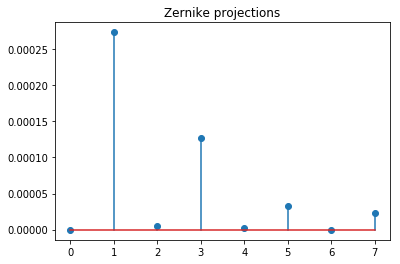

In [4]:
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

x = beam.getshonecol(1)
z = beam.getshonecol(3)
path = beam.getshonecol(13)

Nx = 101
Nz = Nx
x_lin = numpy.linspace(numpy.min(x), numpy.max(x), Nx)
z_lin = numpy.linspace(numpy.min(z), numpy.max(z), Nx)
X, Z = numpy.meshgrid(x_lin,z_lin)
wfe = interpolate.griddata((x,z),path,(X,Z),method='linear')

import sys
import numpy

# commented import astropy and import poppy_core in poppy repo
sys.path.insert(0,"/Users/awojdyla/python/poppy/")
from poppy import zernike

#4 defocus
mask2 = numpy.where(numpy.isnan(wfe))
wfe_proj = wfe.copy()
wfe_proj[mask2] = 0

N_Zern = 8
#define an aperture for the Zernike basis (non-nans)
aperture = wfe.copy()*0+1
aperture[mask2] = 0
ZZ = zernike.arbitrary_basis(aperture, nterms=N_Zern, rho=None, theta=None, outside=0)

proj = numpy.zeros(N_Zern)
for i in numpy.arange(N_Zern):
    Zerni = ZZ[i,:,:]/numpy.sqrt(numpy.sum(ZZ[i,:,:]*ZZ[i,:,:]))
    proj[i] = numpy.sum(wfe_proj*Zerni)

proj[0]=0;

plt.stem(numpy.arange(N_Zern), proj)
plt.title("Zernike projections")
plt.show()

## Looping over the tilt angle

In [5]:
import numpy
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

In [6]:
# some useful functions
def run_shadow_tilt(tilt_deg):
    iwrite = 0

    beam = Shadow.Beam()
    oe0 = Shadow.Source()
    oe1 = Shadow.OE()
    oe2 = Shadow.OE()

    # Define variables. See meaning of variables in: 
    oe0.FDISTR = 1
    oe0.F_PHOT = 0
    oe0.HDIV1 = 0.001
    oe0.HDIV2 = 0.001
    oe0.IDO_VX = 0
    oe0.IDO_VZ = 0
    oe0.IDO_X_S = 0
    oe0.IDO_Y_S = 0
    oe0.IDO_Z_S = 0
    oe0.ISTAR1 = 0
    oe0.NPOINT = 1000
    oe0.PH1 = 603.0
    oe0.SIGMAX = 0.0
    oe0.SIGMAZ = 0.0
    oe0.VDIV1 = 0.001
    oe0.VDIV2 = 0.001

    oe1.DUMMY = 100.0
    oe1.FHIT_C = 1
    oe1.FMIRR = 3
    oe1.FWRITE = 1
    oe1.F_MOVE = 1
    oe1.RLEN1 = 0.1
    oe1.RLEN2 = 0.1
    oe1.RWIDX1 = 0.0025
    oe1.RWIDX2 = 0.0025
    oe1.T_IMAGE = 2.2
    oe1.T_INCIDENCE = 88.5
    oe1.T_REFLECTION = 88.5
    oe1.T_SOURCE = 5.0

    oe2.ALPHA = 90.0
    oe2.DUMMY = 100.0
    oe2.FWRITE = 3
    oe2.F_REFRAC = 2
    oe2.T_IMAGE = -1.0
    oe2.T_INCIDENCE = 90.0
    oe2.T_REFLECTION = 90.0
    oe2.T_SOURCE = 0.0
    # what matters:
    oe1.X_ROT = tilt_deg

    #Run SHADOW to create the source
    if iwrite:
        oe0.write("start.00")

    beam.genSource(oe0)

    if iwrite:
        oe0.write("end.00")
        beam.write("begin.dat")

    #run optical element 1
    #print("    Running optical element: %d"%(1))
    if iwrite:
        oe1.write("start.01")
    beam.traceOE(oe1,1)
    if iwrite:
        oe1.write("end.01")
        beam.write("star.01")

    #run optical element 2
    #print("    Running optical element: %d"%(2))
    if iwrite:
        oe2.write("start.02")
    beam.traceOE(oe2,2)
    if iwrite:
        oe2.write("end.02")
        beam.write("star.02")
        
    return beam
        
def get_zerniked_decomp(beam):
    import numpy
    x = beam.getshonecol(1)
    z = beam.getshonecol(3)
    path = beam.getshonecol(13)

    Nx = 101
    Nz = Nx
    x_lin = numpy.linspace(numpy.min(x), numpy.max(x), Nx)
    z_lin = numpy.linspace(numpy.min(z), numpy.max(z), Nx)
    X, Z = numpy.meshgrid(x_lin,z_lin)
    wfe = interpolate.griddata((x,z),path,(X,Z),method='linear')

    import sys
    import numpy
    #sys.path.insert(0,"/Users/awojdyla/python/poppy/")

    from poppy import zernike
    # commented import astropy and import poppy_core in poppy repo

    #4 defocus
    mask2 = numpy.where(numpy.isnan(wfe))
    wfe_proj = wfe.copy()
    wfe_proj[mask2] = 0

    N_Zern = 9
    #define an aperture for the Zernike basis (non-nans)
    aperture = wfe.copy()*0+1
    aperture[mask2] = 0
    ZZ = zernike.arbitrary_basis(aperture, nterms=N_Zern, rho=None, theta=None, outside=0)

    proj = numpy.zeros(N_Zern)
    for i in numpy.arange(N_Zern):
        Zerni = ZZ[i,:,:]/numpy.sqrt(numpy.sum(ZZ[i,:,:]*ZZ[i,:,:]))
        proj[i] = numpy.sum(wfe_proj*Zerni)

    proj[0]=0;

    #plt.stem(numpy.arange(N_Zern), proj)
    #plt.title("Zernike projections")
    #plt.show()

    return proj

#### Run the many simulations

In [7]:
N_t = 21 # number of tilt angles
N_z = 9   # number of Zernike coefficients
proj = numpy.zeros((N_t, N_z))               
for i in numpy.arange(N_t):
    tilt_deg = 1e-3*180/numpy.pi*(i-(N_t-1)/2)/10
    beam = run_shadow_tilt(tilt_deg)
    proj[i,:] = get_zerniked_decomp(beam)

#### Display coefficients

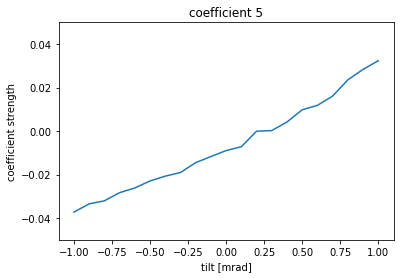

In [12]:
idx = 5 # choose your coefficient; 0: piston, 1:tilt x, 2: tilt y, 3: defocus, 4: atigmatism, 5: obl. ast., 6: coma H
plt.plot(numpy.linspace(-1,1,21),proj[:,idx]*1000)
plt.xlabel('tilt [mrad]')
plt.ylabel('coefficient strength')
plt.title('coefficient '+str(idx))
plt.ylim((-0.05,0.05))
plt.show()


#### display individual Zernike component (for sanity check)

In [9]:
def components(beam, N_i):
    import numpy
    x = beam.getshonecol(1)
    z = beam.getshonecol(3)
    path = beam.getshonecol(13)

    Nx = 101
    Nz = Nx
    x_lin = numpy.linspace(numpy.min(x), numpy.max(x), Nx)
    z_lin = numpy.linspace(numpy.min(z), numpy.max(z), Nx)
    X, Z = numpy.meshgrid(x_lin,z_lin)
    wfe = interpolate.griddata((x,z),path,(X,Z),method='linear')

    import sys
    import numpy
    #sys.path.insert(0,"/Users/awojdyla/python/poppy/")

    from poppy import zernike
    # commented import astropy and import poppy_core in poppy repo

    #4 defocus
    mask2 = numpy.where(numpy.isnan(wfe))
    wfe_proj = wfe.copy()
    wfe_proj[mask2] = 0

    N_Zern = 8
    #define an aperture for the Zernike basis (non-nans)
    aperture = wfe.copy()*0+1
    aperture[mask2] = 0
    ZZ = zernike.arbitrary_basis(aperture, nterms=N_Zern, rho=None, theta=None, outside=0)

    return ZZ[N_i,:,:]/numpy.sqrt(numpy.sum(ZZ[N_i,:,:]*ZZ[N_i,:,:]))

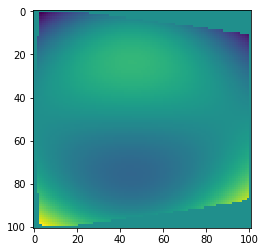

In [10]:
plt.imshow(components(beam,6))
plt.show()